<a href="https://colab.research.google.com/github/Bosy-Ayman/DSAI-456-Speech/blob/main/DSAI_456_Lab_Quiz_1_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [2]:
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile
import zipfile
import os
from IPython.display import Audio
import numpy as np
from scipy.fft import fftshift
from scipy import signal

# Reading & Plots (2)

In [14]:
# Unzip Data
extract_dir = 'data2'
path = '/content/data2.zip'
if not os.path.isdir(extract_dir):
  with zipfile.ZipFile(path,'r') as z:
      z.extractall(extract_dir)
print(os.listdir(extract_dir))

['6.wav', '5.wav', '2.wav', '__MACOSX', '1.wav', '3.wav', '7.wav', '8.wav', '4.wav']


In [16]:
# Read Data
files = os.listdir(extract_dir)
files

['6.wav',
 '5.wav',
 '2.wav',
 '__MACOSX',
 '1.wav',
 '3.wav',
 '7.wav',
 '8.wav',
 '4.wav']

In [18]:
for filename in files:
  if filename.lower().endswith('.wav'):
    file_path = os.path.join('data2',filename)
    waveform,sample_rate = librosa.load(file_path)
    display(Audio(data = waveform,rate = sample_rate))


Use the **mel filter bank** from the **Librosa** library to generate **bar plots** for audio files No. 1 and
No. 4. After generating the plots, provide a detailed comparison between the two audios,
explaining the differences in their mel content, the energy distribution across frequency
bands, and the effects of noise or distinct speaker characteristics as observed in the
visualized mel filter bank representations.

In [19]:
file1 = os.path.join(extract_dir, '1.wav')
file4 = os.path.join(extract_dir, '4.wav')

In [20]:
y1, sr1 = librosa.load(file1, sr=None)
y4, sr4 = librosa.load(file4, sr=None)

In [21]:
mel1 = librosa.feature.melspectrogram(y=y1, sr=sr1, n_mels=40)
mel4 = librosa.feature.melspectrogram(y=y4, sr=sr4, n_mels=40)

In [24]:
mel1_db = librosa.power_to_db(mel1, ref=np.max)
mel4_db = librosa.power_to_db(mel4, ref=np.max)

In [25]:
mel1_mean = np.mean(mel1_db, axis=1)
mel4_mean = np.mean(mel4_db, axis=1)

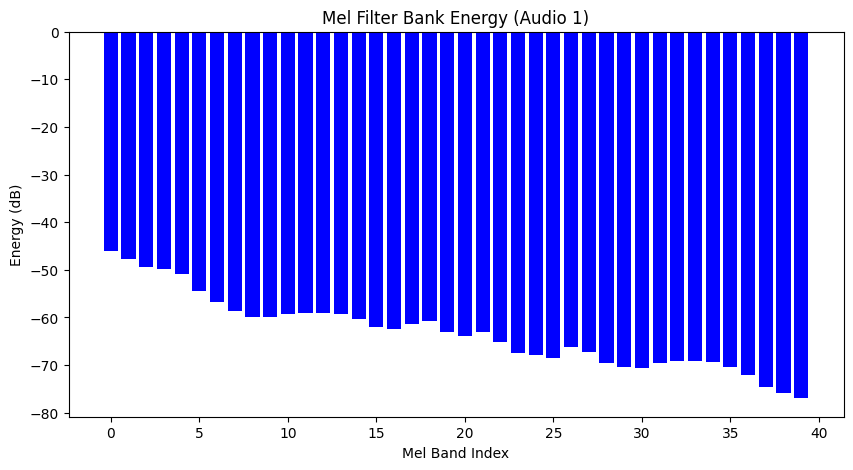

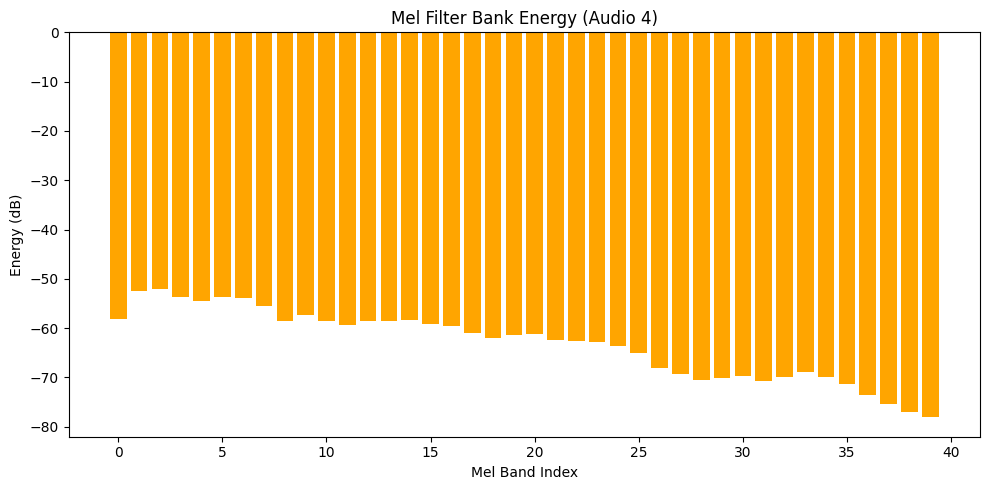

In [34]:

plt.figure(figsize=(10,5))
plt.bar(np.arange(40), mel1_mean, color='blue')
plt.title("Mel Filter Bank Energy (Audio 1)")
plt.xlabel("Mel Band Index")
plt.ylabel("Energy (dB)")

plt.figure(figsize=(10,5))
plt.bar(np.arange(40), mel4_mean, color='orange')
plt.title("Mel Filter Bank Energy (Audio 4)")
plt.xlabel("Mel Band Index")
plt.ylabel("Energy (dB)")

plt.tight_layout()
plt.show()

**Use** **mel filter bank** from librosa

**Use it** to generate bar plots for No 1 and No 4 provided audio files.

**Write a detailed comparison** explaining differences in **mel content** between the two audios, differences in **energy distribution**, and **effects of noise or different speaker characteristics** as visible in the plot.

# Gender & Emotion Game (3)


In [ ]:
# Write your code

In [39]:
def plot_mel_spectrogram(waveform,sample_rate):

  S = librosa.feature.melspectrogram(y = waveform,sr = sample_rate)
  fig, ax = plt.subplots()
  S_dB = librosa.power_to_db(S, ref=np.max)
  img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sample_rate,
                         fmax=8000, ax=ax)
  fig.colorbar(img, ax=ax, format='%+2.0f dB')
  ax.set(title='Mel-frequency spectrogram')

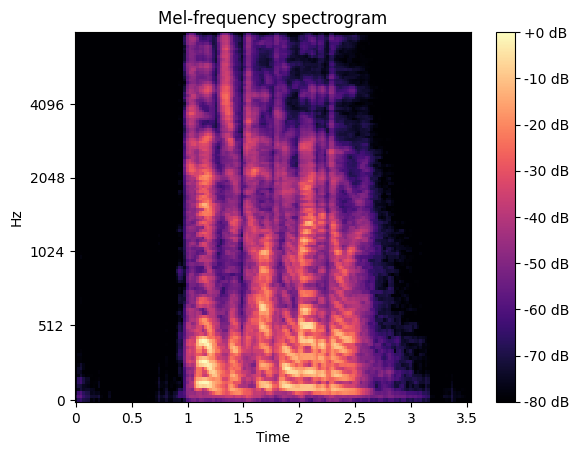

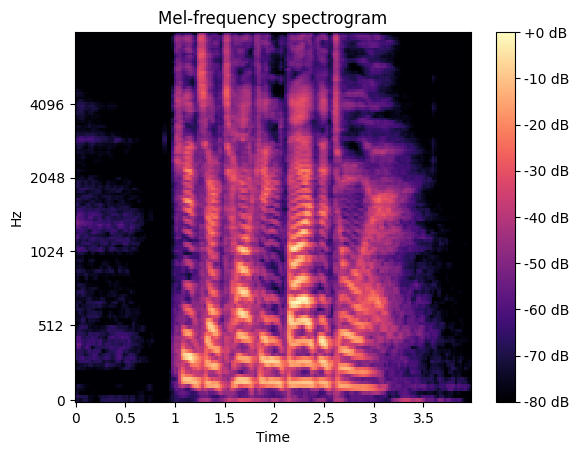

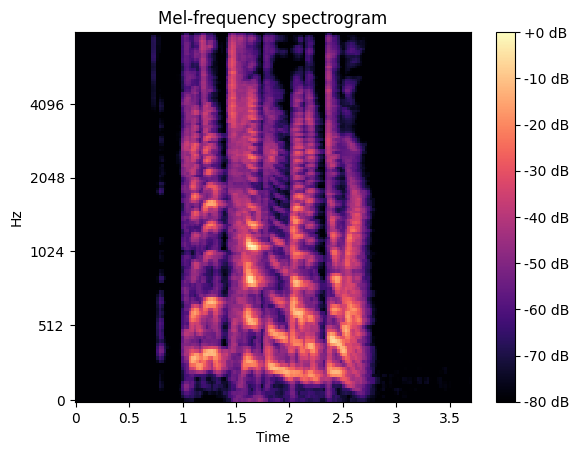

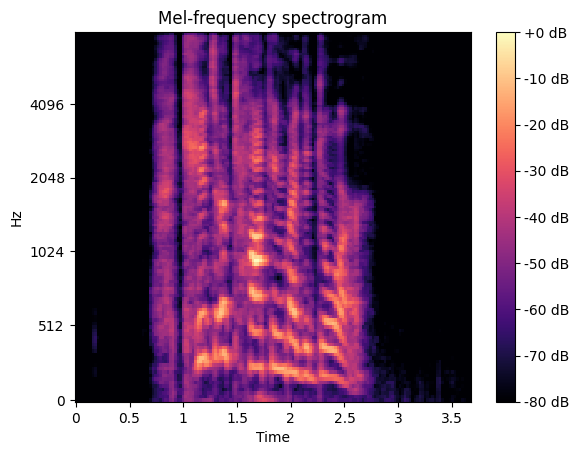

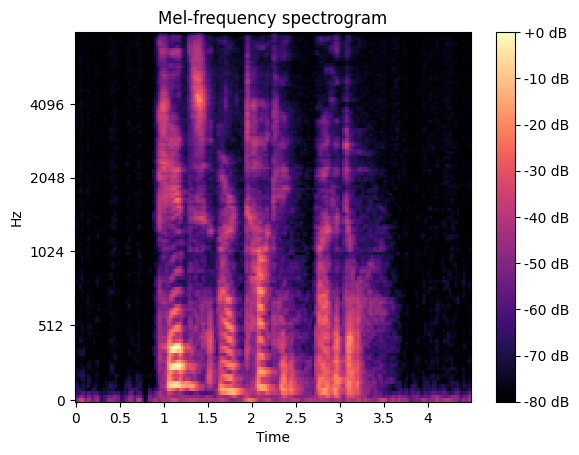

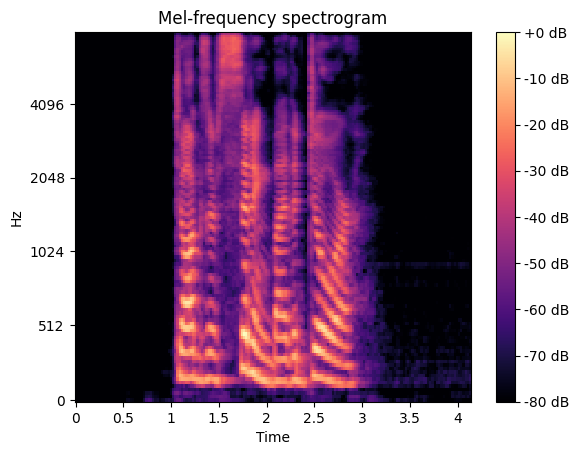

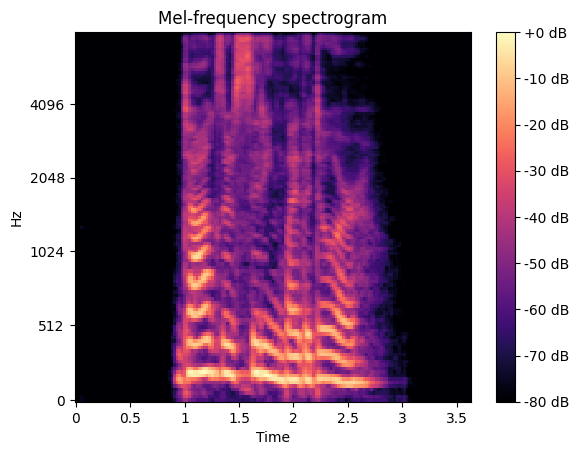

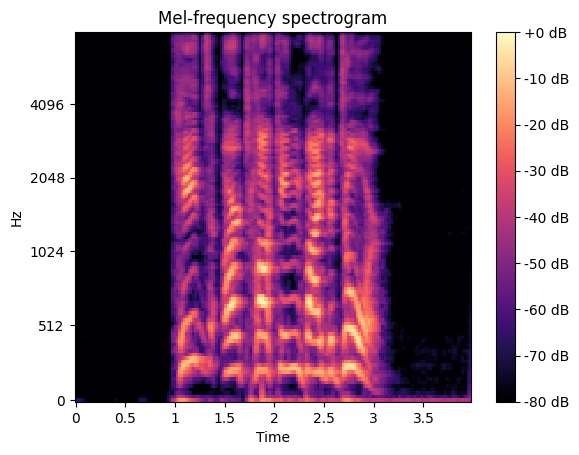

In [40]:
for filename in files:
  if filename.lower().endswith('.wav'):
    file_path = os.path.join(extract_dir,filename)
    waveform,sample_rate = librosa.load(file_path)
    plot_mel_spectrogram(waveform,sample_rate)


---

| Emotion         | Typical RMS range |
| --------------- | ----------------- |
| Calm            | 0.01 – 0.03       |
| Angry / Excited | 0.05 – 0.15       |


In [53]:

def analyze(file_path):
  waveform,sample_rate = librosa.load(file_path)

  f0 = librosa.yin(waveform,fmin = 50 ,fmax = 300)
  mean_f0 = np.mean(f0)

  rms = librosa.feature.rms(y = waveform)
  mean_rms =np.mean(rms)


  return mean_f0,mean_rms

In [62]:
for filename in files:
  if filename.lower().endswith('.wav'):
    file_path = os.path.join(extract_dir,filename)
    mean_f0,mean_rms= analyze(file_path)

  if mean_f0<160:
    gender ='male'
  else:
    gender = 'female'


  if mean_rms>0.04:
    emotion='Angry'
  else:
    emotion='calm'
  print(filename,'F0',mean_f0,'gender',gender)
  print(filename,'RMS',mean_rms,'gender',emotion)




1.wav F0 86.17975250687218 gender male
1.wav RMS 0.0016532314 gender calm
2.wav F0 154.71738269603168 gender male
2.wav RMS 0.007872352 gender calm
3.wav F0 184.8541369600674 gender female
3.wav RMS 0.007930033 gender calm
4.wav F0 138.94889294145557 gender male
4.wav RMS 0.0073929364 gender calm
5.wav F0 136.81089282007454 gender male
5.wav RMS 0.00049930095 gender calm
6.wav F0 152.64092946036078 gender male
6.wav RMS 0.004917912 gender calm
7.wav F0 150.5823666480681 gender male
7.wav RMS 0.0032763416 gender calm
8.wav F0 254.79328362074799 gender female
8.wav RMS 0.029369446 gender calm


Explain your logic, which features you used and why you think there's a pattern there.

Gender separation worked well: files with high mean F₀ (3 and 8) are classified as female, others as male.

Example: 8.wav F₀ ≈ 255 Hz — clear female.

3.wav F₀ ≈ 185 Hz — female but slightly borderline (close to the 165–180 overlap region).

Emotion (calm/angry) did not flag any “angry” with the RMS threshold 0.04: all RMS values are below 0.04 → all classified calm.

Even 8.wav which has the highest RMS (0.029) is below 0.04, so by that rule it is calm.

So the pattern is: pitch divides gender cleanly in this set, while RMS (with that threshold) does not separate emotion because the clips are generally low-energy / quiet or recorded at different levels.